In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv
import collections
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(10,5)})
plt.style.use('ggplot')

In [2]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stop_words = set(stopwords.words('english'))
stemer = PorterStemmer()

In [6]:
input_path = '/Users/shahreenshahjahanpsyche/Desktop/SATP-Event-Classification/Data_MachineLearning/is_relevant_data.csv'
df = pd.read_csv(input_path, header=[0])
df.head(10)

,is_relevant,news
0,True,Two Lashkar e Jhangvi LeJ militants Asim alias...
1,True,The Commander Southern Command Lieutenant Gene...
2,True,Meanwhile the underground organization Manipur...
3,True,Islamic State IS in the latest issue of its on...
4,True,A senior Muttahida Qaumi Movement MQM worker i...
5,True,The ongoing construction work of an interstate...
6,True,Two civilians were injured when unidentified a...
7,True,More than a week after a woman Communist Party...
8,True,Three boys sustained injuries when a landmine ...
9,True,Unidentified militants shot dead a Frontier Co...


In [7]:
def model(df_action, action_type):
    
    counter = Counter(df_action[action_type].tolist())
    top_10_varieties = {i[0]: idx for idx, i in enumerate(counter.most_common(10))}
    df_action = df_action[df_action[action_type].map(lambda x: x in top_10_varieties)]
    
    description_list = df_action['news'].tolist()
    varietal_list = [top_10_varieties[i] for i in df_action[action_type].tolist()]
    varietal_list = np.array(varietal_list)
    count_vect = CountVectorizer()
    x_train_counts = count_vect.fit_transform(description_list)
    tfidf_transformer = TfidfTransformer()
    x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)
    train_x, test_x, train_y, test_y = train_test_split(x_train_tfidf, varietal_list, test_size=0.3)
    
    clf = MultinomialNB().fit(train_x, train_y)
    print("Naive bayes")
    y_score = clf.predict(test_x)
    print(classification_report(test_y, y_score))
    
    print("SVM")
    clf = SVC(kernel='linear').fit(train_x, train_y)
    y_score = clf.predict(test_x)
    print(classification_report(test_y, y_score))

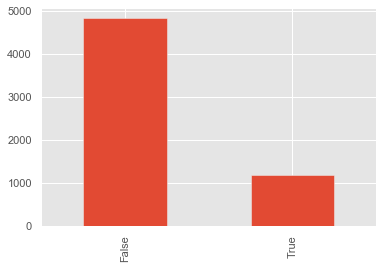

In [10]:
fig, ax = plt.subplots()
df['is_relevant'].value_counts().plot(ax=ax, kind='bar')

In [11]:
model(df, 'is_relevant')

Naive bayes
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1450
           1       1.00      0.00      0.01       350

    accuracy                           0.81      1800
   macro avg       0.90      0.50      0.45      1800
weighted avg       0.84      0.81      0.72      1800

SVM
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1450
           1       0.82      0.71      0.76       350

    accuracy                           0.91      1800
   macro avg       0.88      0.83      0.85      1800
weighted avg       0.91      0.91      0.91      1800

